# Проект

In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


Импортируем необходимые библиотеки

In [3]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt 

Передаем ссылку на сайт с данными

In [3]:
test_url = 'https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics' 
print(test_url) 

https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics


Проверяем, нормально ли он относится к парсингу

In [4]:
response = requests.get(test_url)
response

<Response [200]>

Все хорошо, теперь получаем ссылку через селениум, потому что BeautifulSoup показывал не полный код

In [5]:
browser = webdriver.Chrome()
browser.get('https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics')

In [6]:
# теперь с нормальной ссылкой переходим с помощью BeautifulSoup к более удобному формату
tree = BeautifulSoup(browser.page_source) 

In [7]:
# надо вызвать дерево, потом во вкладке хрома полистать таблицу до конца, чтобы прогрузилась, потом еще раз выполнить эту строку
tree

<html lang="en"><head>
<title>Student performance prediction | Kaggle</title>
<meta charset="utf-8"/>
<meta content="index, follow" name="robots"/>
<meta content="This dataset contains information on the performance of students in mathematics" name="description"/>
<meta content="no-cache" name="turbolinks-cache-control"/>
<meta content="education,tabular,beginner,data analytics,classification" name="keywords"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0, minimum-scale=1.0" name="viewport"/>
<meta content="#008ABC" name="theme-color"/>
<link crossorigin="anonymous" href="https://gc.kis.v2.scr.kaspersky-labs.com/E3E8934C-235A-4B0E-825A-35A08381A191/abn/main.css?attr=aHR0cHM6Ly93d3cua2FnZ2xlLmNvbS9kYXRhc2V0cy9ya2lhdHRpc2FrL3N0dWRlbnQtcGVyZm9ybWFuY2UtaW4tbWF0aGVtYXRpY3M" rel="stylesheet"/><script async="" nonce="" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.lb.ru.lS04NZ2t4-g.O/m=auth2,client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo9qXYkOfeWFOX3TwgVjL8bPaI_VcA

Создаем списки для данных и названий колонок. Все будем доставать из разных частей страницы, чтобы было не так скучно

In [25]:
data = [] 
names = []

Сначала достаем названия колонок в будущей таблице

In [26]:
name = tree.find_all('div', {'class' : 'sc-dmLtQE jWwnsR'})
for i in name:
    names.append(i.find_all('strong')[0].text)
    names.append(i.find_all('strong')[1].text), 
    names.append(i.find_all('strong')[2].text),
    names.append(i.find_all('strong')[3].text),
    names.append(i.find_all('strong')[4].text),
    names.append(i.find_all('strong')[5].text),
    names.append(i.find_all('strong')[6].text),
    names.append(i.find_all('strong')[7].text)
names = [n.replace(":", "") for n in names] # чтобы убрать ":" после каждого названия
names

['Gender',
 'Race/ethnicity',
 'Parental level of education',
 'Lunch',
 'Test preparation course',
 'Math score',
 'Reading score',
 'Writing score']

Теперь сами данные. Так как никаких страниц и вкладок дополнительно открывать не нужно, делем парсинг без функции

In [27]:
strings = tree.find_all('span', {'class' : 'sc-cCYyox sc-cjERFW jxeAHX fWvmCS'}) # Это обращение к отдельной строке таблицы

for item in strings:
    data.append({'1': item.find_all('div')[1].text,
                     '2': item.find_all('div')[2].text,
                     '3': item.find_all('div')[3].text,
                     '4': item.find_all('div')[4].text,
                     '5': item.find_all('div')[5].text,
                     '6': item.find_all('div')[6].text,
                     '7': item.find_all('div')[7].text,
                     '8': item.find_all('div')[8].text})

Запишем все это в таблицу

In [28]:
df = pd.DataFrame(data)
df.columns = names # заменим числа в названии на нормальные названия из names
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


Теперь все это запишу в файл

In [29]:
df.to_csv('AnDan_project.csv', index=False,  encoding='utf-8')

Часть с парсингом закончена. Теперь работаем с данными. Уже из нового файла откроем таблицу

In [4]:
df = pd.read_csv('AnDan_project.csv', sep=',')
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


Определим к какому виду переменных относятся переменные в нашей таблице. 

In [5]:
df.dtypes

Gender                         object
Race/ethnicity                 object
Parental level of education    object
Lunch                          object
Test preparation course        object
Math score                      int64
Reading score                   int64
Writing score                   int64
dtype: object

В получившейся таблице первые 5 колонок содержат категориальные переменные и следующие 3 колонки содержащат количественные переменные. 
Опишем все колонки по порядку. 

• "Gender" (Пол): пол учащегося (male - мужской/ female - женский)

• "Race / ethnicity" (Раса/этническая принадлежность): расовая или этническая принадлежность учащегося (group A, B, C, D, E)

• "Parental level of education" (Уровень образования родителей): самый высокий уровень образования, полученный родителем (родителями) или опекуном (опекунами) учащегося.

• "Lunch" (Обед): получает ли учащийся стандартный обед или обед по сниженной цене (standart - стандартный, free/reduced - бесплатный или по сниженной цене)

• "Test preparation course" (Курс подготовки к экзаменам): прошел ли учащийся курс подготовки к экзаменам (completed - да/ none - нет)

• "Math score" (Оценка по математике): балл учащегося по стандартному тесту по математике.

• "Reading score" (Оценка по чтению): балл учащегося по стандартному тесту по чтению.

• "Writing score" (Оценка по письму): балл учащегося по стандартному  тесту по письму.


Проверим есть ли в данных пропуски. 

In [6]:
df.isna().sum()

Gender                         0
Race/ethnicity                 0
Parental level of education    0
Lunch                          0
Test preparation course        0
Math score                     0
Reading score                  0
Writing score                  0
dtype: int64

Судя по полученной информации, ни в одной колонке пропусков нет. С данными можно продолжать работать. 

Рассмотрим колонку с информацией об образовании родителей (опекунов). 

In [7]:
df['Parental level of education'].value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: Parental level of education, dtype: int64

В этой колонке существуют такие переменные, как "high school" и "some high school". Не совсем понятна разница между ними, 
поэтому соединим их. Также уберем слово "some" из "some college". 

In [8]:
df = df.replace('some high school', 'high school')
df = df.replace('some college', 'college')

In [9]:
df['Parental level of education'].value_counts()

high school           392
college               224
associate's degree    204
bachelor's degree     105
master's degree        75
Name: Parental level of education, dtype: int64

Нам удалось изменить переменные в колонке. Продолжим с ней работать.

Text(0, 0.5, 'Count')

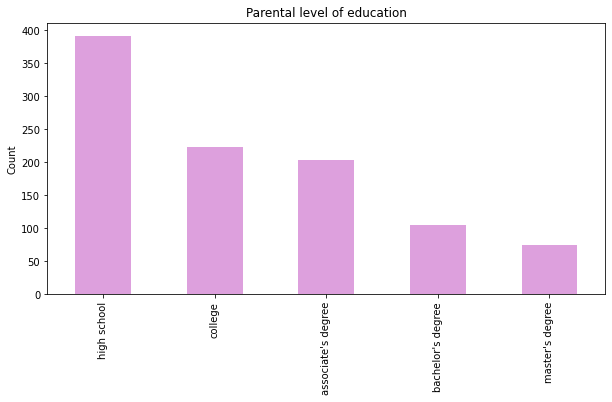

In [12]:
ed = df['Parental level of education'].value_counts().plot(kind = 'bar', title = 'Parental level of education', color = 'plum', figsize=(10, 5))
ed.set_ylabel('Count')

Так, родители большинства учеников, почти половина, закончили только школу, около 200 закончили колледж и примерно треть имеют ученую степень

Рассмотрим столбцы с баллами за тесты. Просуммируем баллы каждого ученика по всем предметам, чтобы найти общий балл.

In [26]:
df['Total_score'] = df['Math score'] + df['Reading score'] + df['Writing score']
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total_score
0,female,group D,college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,college,free/reduced,none,57,76,77,210
3,male,group B,college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
995,male,group C,college,standard,none,77,77,71,225
996,male,group C,college,standard,none,80,66,66,212
997,female,group A,high school,standard,completed,67,86,86,239
998,male,group E,high school,standard,none,80,72,62,214


Text(0.5, 0, 'Points')

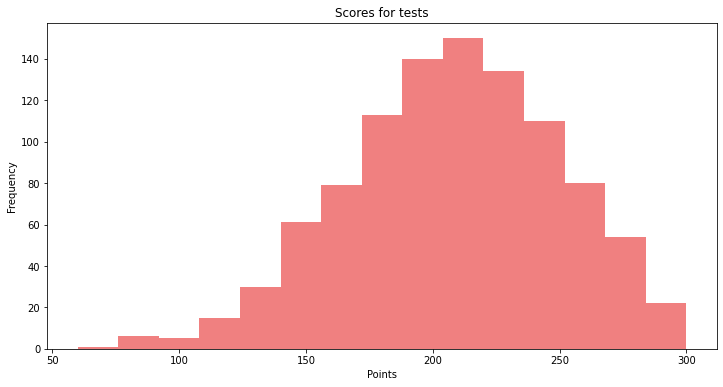

In [51]:
scores = df['Total_score'].plot(kind = 'hist', bins = 15, title = 'Scores for tests', color = 'lightcoral', figsize=(12,6))
scores.set_xlabel('Points')

Таким образом, большинство учеников имеют общий бал 200-210, распределение баллов похоже на нормальное, однако баллы больше среднего встречаются с одинаково убывающей частотой, а с меньшей стороны - наоборот, резко. Кроме того в промежутке от 50 до 100 могут иметь место выбросы

Text(0.5, 0, 'Points')

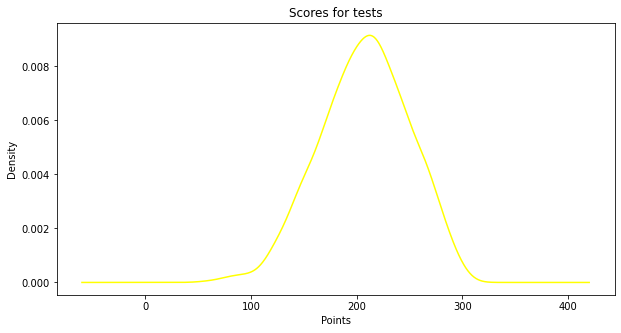

In [28]:
scores = df['Total_score'].plot(kind = 'kde', title = 'Scores for tests', color = 'yellow', figsize=(10, 5))
scores.set_xlabel('Points')

Судя по графику, самые распространенные баллы за тесты около 200. Распределение является нормальным

Рассмотрим колонку с информацией о поле.

Text(0.5, 0, 'Counts')

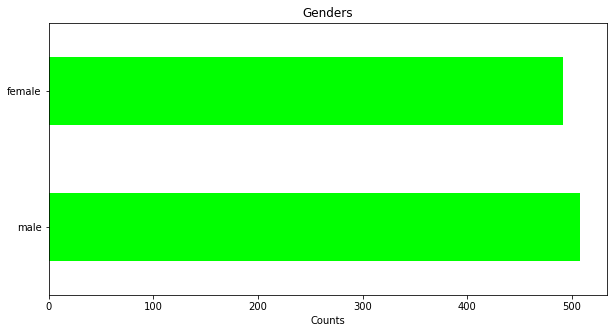

In [29]:
gend = df['Gender'].value_counts().plot(kind = 'barh', title = 'Genders', color='lime', figsize=(10, 5))
gend.set_xlabel('Counts')

Таким образом, мальчиков незначительно больше, чем девочек

Создадим графики ко всем остальным колонкам для облегчения их анализа. 

Text(0.5, 0, 'Counts')

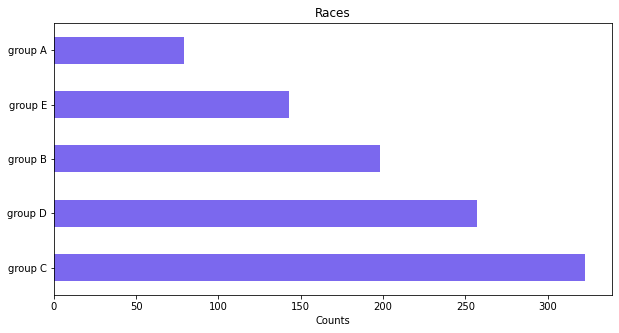

In [30]:
race = df['Race/ethnicity'].value_counts().plot(kind = 'barh', title = 'Races', color = 'mediumslateblue', figsize=(10, 5))
race.set_xlabel('Counts')

Так, имеется существенное различие в частоте, с которой встречаются разные расы. Самая многочисленная - группа С, а самая малочисленная - А

Text(0.5, 0, 'Counts')

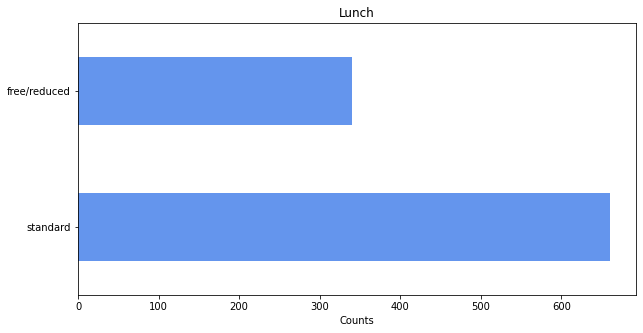

In [31]:
lunch = df['Lunch'].value_counts().plot(kind = 'barh', title = 'Lunch', color='cornflowerblue', figsize=(10, 5))
lunch.set_xlabel('Counts')

Большинство студентов ели стандартный ланч, и около трети - социальный (бесплатный). В таких датасетах эта характеристика является способом показать уровень доходов школьника 

Text(0.5, 0, 'Counts')

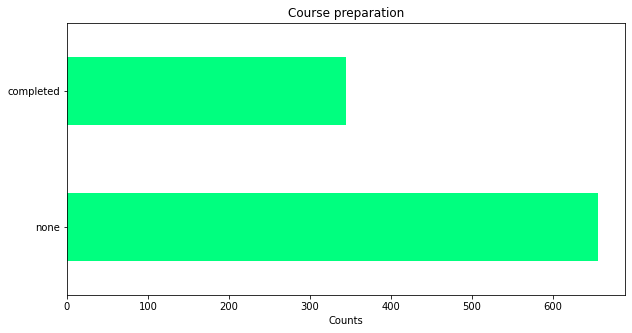

In [53]:
course = df['Test preparation course'].value_counts().plot(kind = 'barh', title = 'Course preparation', color = 'springgreen', figsize=(10, 5))
course.set_xlabel('Counts')

Только треть студентов прошли подготовительный курс, то есть это не связано с уровнем достатка (ланч).

In [33]:
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total_score
0,female,group D,college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,college,free/reduced,none,57,76,77,210
3,male,group B,college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
995,male,group C,college,standard,none,77,77,71,225
996,male,group C,college,standard,none,80,66,66,212
997,female,group A,high school,standard,completed,67,86,86,239
998,male,group E,high school,standard,none,80,72,62,214


Зависимость между образованием родителей и общим баллом 

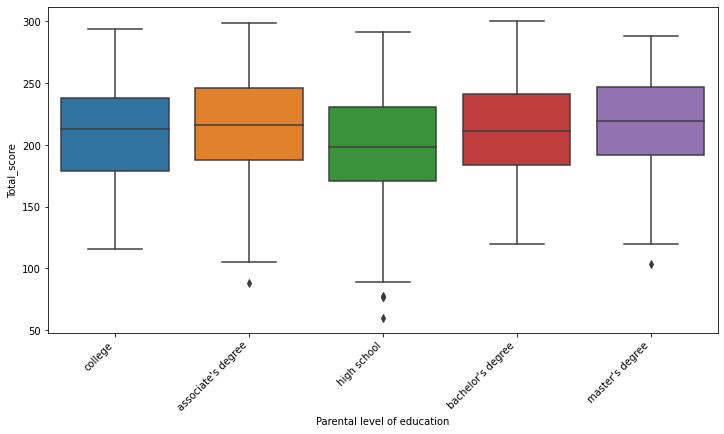

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Parental level of education', y = 'Total_score', data = df)
plt.xticks(rotation=45, 
           ha='right')
plt.show()

Зависимость между образованем родителей и общим баллом по тестам учащихся. 

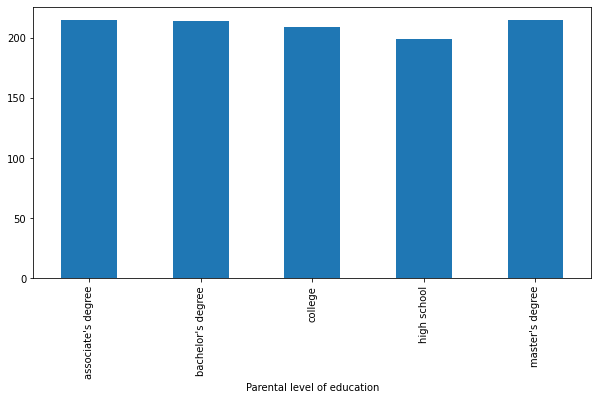

In [35]:
ed_mean = df.groupby('Parental level of education')['Total_score'].mean().plot(kind = 'bar', figsize=(10, 5))

Зависимость между прохождением курса и суммарными баллами

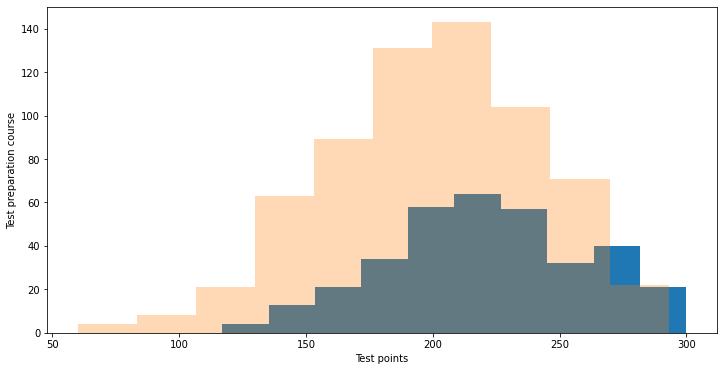

In [36]:
plt.figure(figsize=(12,6))
plt.hist(x = df[df['Test preparation course'] == 'completed']['Total_score'])
plt.hist(x = df[df['Test preparation course'] == 'none']['Total_score'], alpha = 0.3)
plt.xlabel("Test points")
plt.ylabel("Test preparation course")
plt.show()

Зависимость между присутствием бесплатного ланча и суммарными баллами

<Axes: xlabel='Total_score', ylabel='Count'>

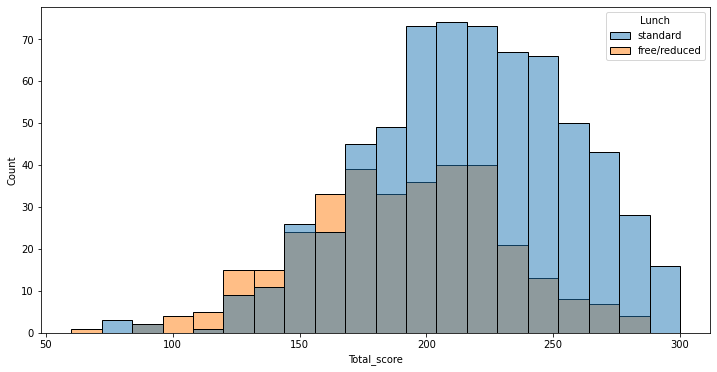

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'Total_score', hue = 'Lunch', data = df, bins = 20)

Зависимость между прохождением курса и присутствием бесплатного обеда

<Axes: xlabel='Lunch', ylabel='count'>

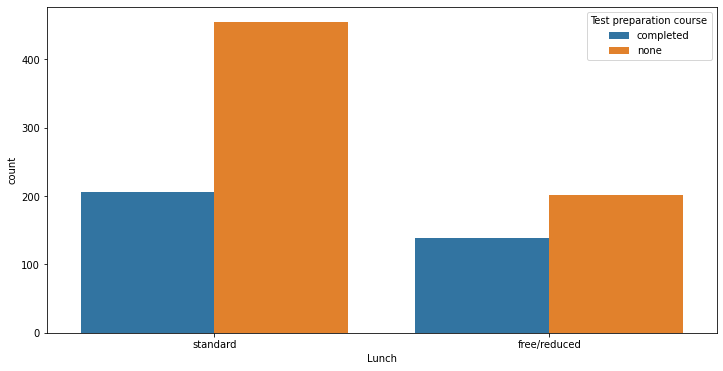

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Lunch', hue = 'Test preparation course', data = df)

Зависимость между баллами по тесту по математике и баллами по чтению

<Axes: xlabel='Math score', ylabel='Reading score'>

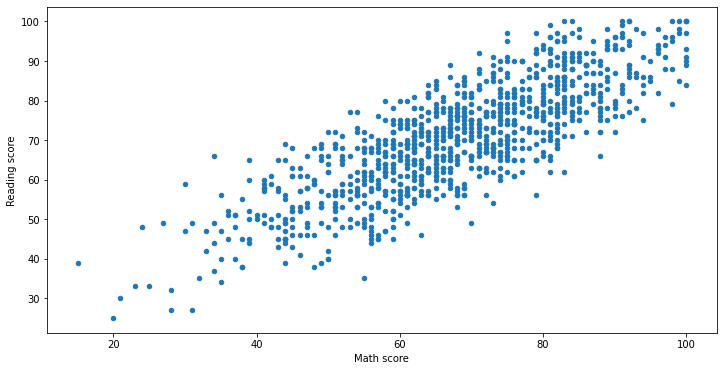

In [43]:
df.plot(kind = 'scatter', x = 'Math score', y = 'Reading score', figsize=(12 , 6))

Зависимость между баллами по математике и баллами по письму

<Axes: xlabel='Math score', ylabel='Writing score'>

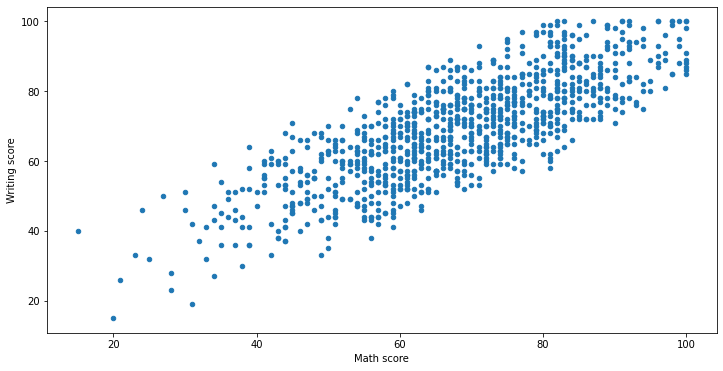

In [44]:
df.plot(kind = 'scatter', x = 'Math score', y = 'Writing score', figsize=(12 , 6))

In [41]:
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total_score
0,female,group D,college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,college,free/reduced,none,57,76,77,210
3,male,group B,college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
995,male,group C,college,standard,none,77,77,71,225
996,male,group C,college,standard,none,80,66,66,212
997,female,group A,high school,standard,completed,67,86,86,239
998,male,group E,high school,standard,none,80,72,62,214


## Гипотезы

1. Пол не влияет на общий балл


2. Раса на влияет на общий балл


3. Наличие ученой степени у родителя повышает шансы ребенка иметь высокий общий балл


4. Студенты, которые ели бесплатный ланч и не прошли подготовительный курс учатся хуже


5. Чем выше балл студента по математике, тем больше его общий балл


6. Чем больше общий балл студента, тем больше он девочка) 

## Примерный план:

1. Вначале закодируем категориальные переменные, разделим выборку на трейн-тест (8:2)


2. Потом построим графики остатков, чтобы убедиться, что модель линейная


3. Допустим, мы хотим понять, кто из школьников имеет шансы посутпить на бюджет, поэтому целевая переменная - обший балл студента. Для этого построим линейную регрессионную модель и проверим гипотезы


4. Если не передумаем, построим логистическую регрессию, чтобы понять по баллу и другим признакам пол школьника